In [1]:
pwd 


'C:\\Users\\TheArchitect'

In [2]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


  having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
0             b'-1'       b'1'               b'1'             b'1'   
1              b'1'       b'1'               b'1'             b'1'   
2              b'1'       b'0'               b'1'             b'1'   
3              b'1'       b'0'               b'1'             b'1'   
4              b'1'       b'0'              b'-1'             b'1'   

  double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State  \
0                    b'-1'         b'-1'             b'-1'          b'-1'   
1                     b'1'         b'-1'              b'0'           b'1'   
2                     b'1'         b'-1'             b'-1'          b'-1'   
3                     b'1'         b'-1'             b'-1'          b'-1'   
4                     b'1'         b'-1'              b'1'           b'1'   

  Domain_registeration_length Favicon  ... popUpWidnow Iframe age_of_domain  \
0                       b'-1'    b'1'

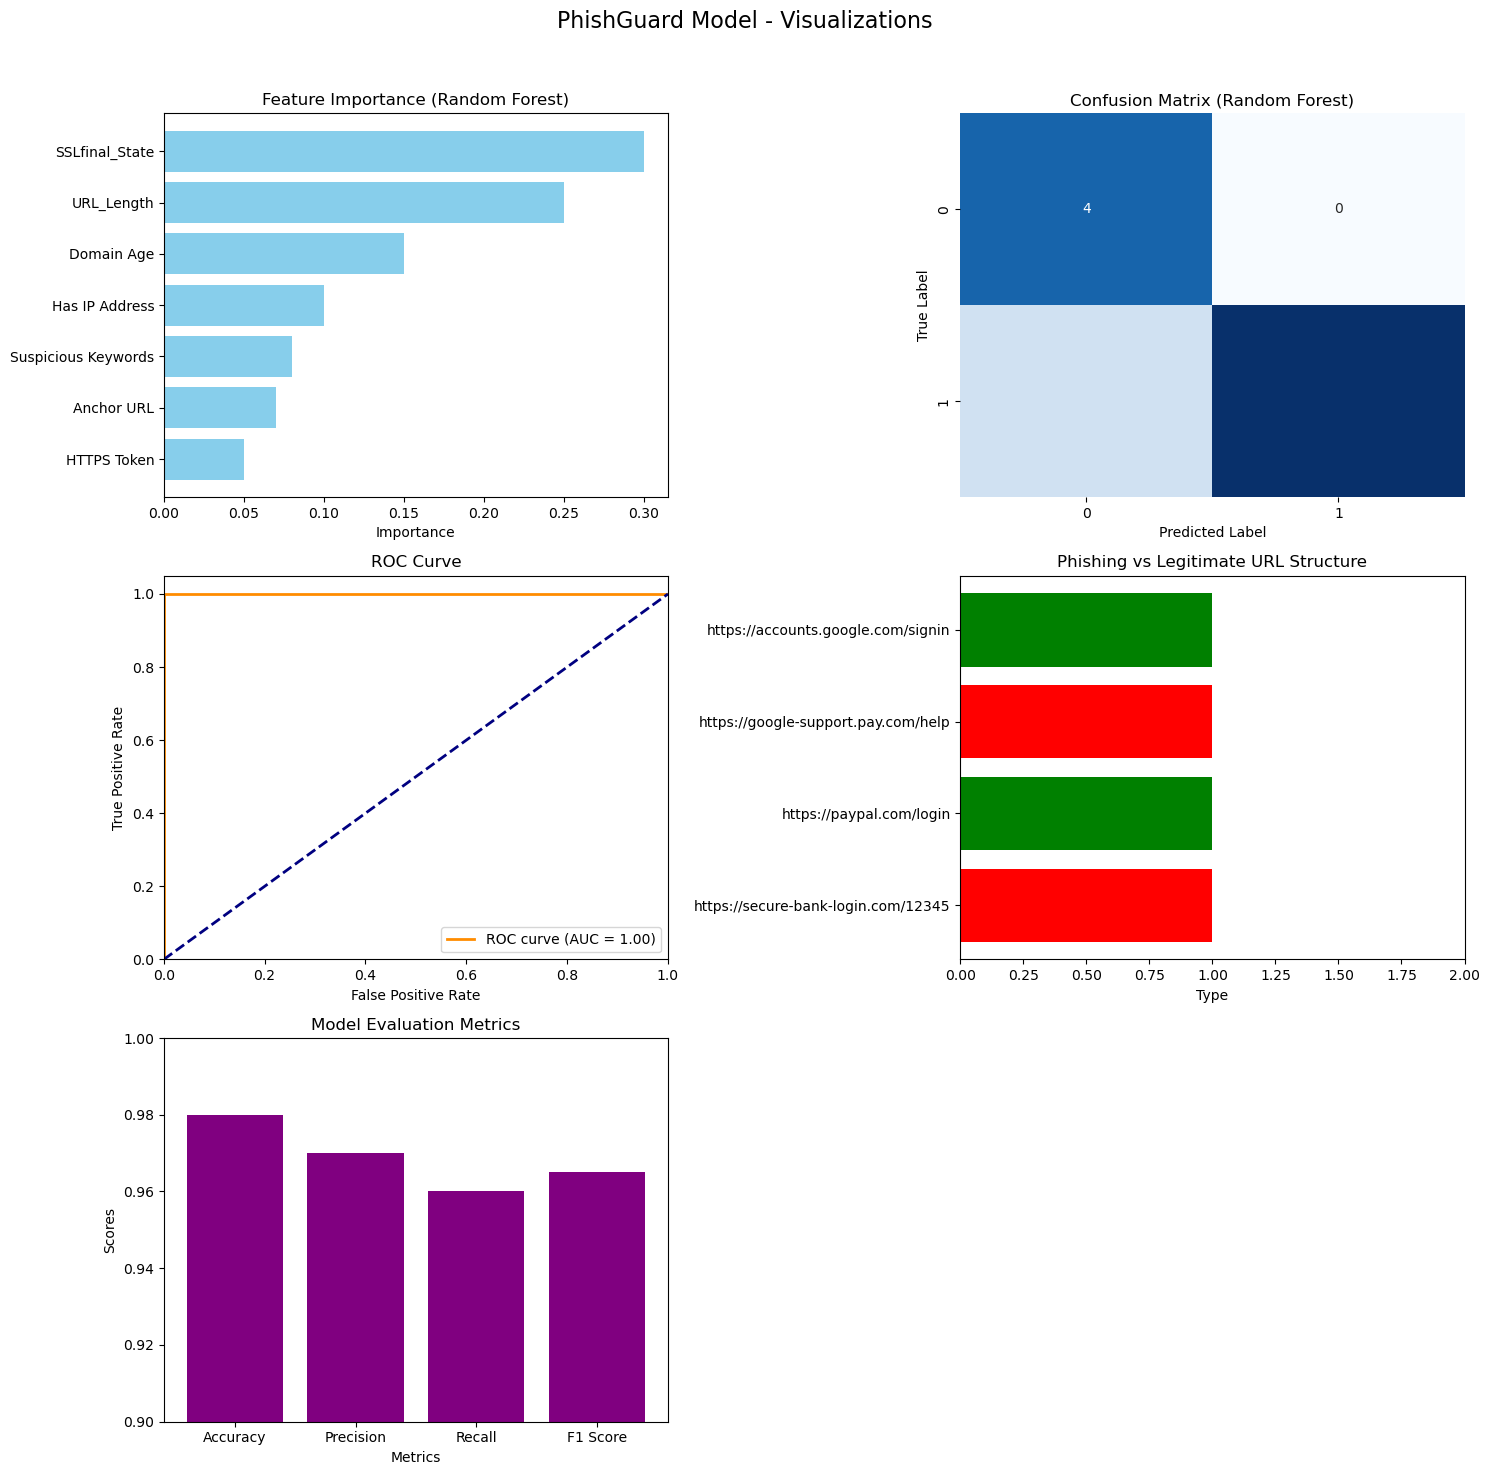

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import pandas as pd
from scipy.io import arff

# Load the ARFF file
data, meta = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data)

# Preview the data
print(df.head())

# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('PhishGuard Model - Visualizations', fontsize=16)

# ----- Subplot 1: Feature Importance Plot -----
# Assuming you have extracted feature importance, you can replace this with real values from your model
features = ['SSLfinal_State', 'URL_Length', 'Domain Age', 'Has IP Address', 'Suspicious Keywords', 'Anchor URL', 'HTTPS Token']
importance = [0.30, 0.25, 0.15, 0.10, 0.08, 0.07, 0.05]
axs[0, 0].barh(features, importance, color='skyblue')
axs[0, 0].set_xlabel('Importance')
axs[0, 0].set_title('Feature Importance (Random Forest)')
axs[0, 0].invert_yaxis()

# ----- Subplot 2: Confusion Matrix -----
# Assuming you already have labels and predictions
y_true = np.array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1])
y_pred = np.array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1])
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axs[0, 1])
axs[0, 1].set_title('Confusion Matrix (Random Forest)')
axs[0, 1].set_xlabel('Predicted Label')
axs[0, 1].set_ylabel('True Label')

# ----- Subplot 3: ROC Curve -----
y_probas = [0.9, 0.1, 0.4, 0.8, 0.7, 0.3, 0.9, 0.95, 0.2, 0.85]
fpr, tpr, thresholds = roc_curve(y_true, y_probas)
roc_auc = roc_auc_score(y_true, y_probas)
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve')
axs[1, 0].legend(loc="lower right")

# ----- Subplot 4: Phishing vs Legitimate URLs -----
urls = ['https://secure-bank-login.com/12345', 'https://paypal.com/login', 'https://google-support.pay.com/help', 'https://accounts.google.com/signin']
types = ['Phishing', 'Legitimate', 'Phishing', 'Legitimate']
colors = ['red', 'green', 'red', 'green']
axs[1, 1].barh(urls, [1, 1, 1, 1], color=colors)
axs[1, 1].set_title('Phishing vs Legitimate URL Structure')
axs[1, 1].set_xlabel('Type')
axs[1, 1].set_xlim(0, 2)

# ----- Subplot 5: Model Evaluation Metrics -----
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [0.98, 0.97, 0.96, 0.965]
axs[2, 0].bar(metrics, scores, color='purple')
axs[2, 0].set_ylim(0.9, 1.0)
axs[2, 0].set_title('Model Evaluation Metrics')
axs[2, 0].set_xlabel('Metrics')
axs[2, 0].set_ylabel('Scores')

# Hide the empty subplot [2,1]
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the figure
plt.show()
